<img src='https://cdn.wbez.org/image/f4d19da9e8d1baf914e6eb8e57beb0ce'>
<h1><center> Chicago Police Schedule Recommendation </center></h1>

## 1. DEFINE

We want to look at recent crime data from Chicago metropolitian area and recommend police scheduling to reduce life threating crimes (assault,murders etc) in neighborhoods with high crimes rates or neighborhood with high murder rates.

The crime data is from 2019 and collected is from [City of Chicago site](https://data.cityofchicago.org/Public-Safety/Crimes-2019/w98m-zvie)

The recommendation will help predict heinous crimes based on several factors in different Chicago neighborhoods and help schedule Chicago police department staff officers so the chances of crimes are reduced.

In [2]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## 2. DISCOVER

In [68]:
data = pd.read_csv('ChicagoCrime_2019.csv')
data2018 = pd.read_csv('ChicagoCrime_2018.csv')
data2019 = pd.read_csv('ChicagoCrime_2019.csv')

# Merge the two dataframes, using _ID column as key
data2018_2019 = pd.concat([data2018, data2019], axis=0)
data2018_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458239 entries, 0 to 190721
Data columns (total 30 columns):
ID                            458239 non-null int64
Case Number                   458239 non-null object
Date                          458239 non-null object
Block                         458239 non-null object
IUCR                          458239 non-null object
Primary Type                  458239 non-null object
Description                   458239 non-null object
Location Description          456656 non-null object
Arrest                        458239 non-null bool
Domestic                      458239 non-null bool
Beat                          458239 non-null int64
District                      458239 non-null int64
Ward                          458227 non-null float64
Community Area                458235 non-null float64
FBI Code                      458239 non-null object
X Coordinate                  453031 non-null float64
Y Coordinate                  453031 non-null

In [67]:
# View the first five rows
data2018.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
267512,11727938,JC312141,01/01/2018 12:00:00 AM,056XX S CAMPBELL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267513,11196173,JB105519,01/01/2018 12:00:00 AM,075XX S ST LOUIS AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,False,False,...,-87.709916,"(41.756324845, -87.709916401)",6.0,"4,300",69.0,498.0,30.0,8.0,13.0,226.0
267514,11192892,JB101037,01/01/2018 12:00:00 AM,017XX W HARRISON ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,OTHER,False,False,...,-87.669246,"(41.874158475, -87.669246221)",48.0,"21,184",29.0,90.0,46.0,28.0,15.0,136.0
267515,11220328,JB137687,01/01/2018 12:00:00 AM,038XX N DRAKE AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,True,True,...,-87.716502,"(41.950777548, -87.716502434)",15.0,"21,538",16.0,325.0,12.0,39.0,1.0,20.0
267516,11855678,JC465519,01/01/2018 12:00:00 AM,008XX S RACINE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [69]:
data2018_2019.astype('object').describe().transpose()

,count,unique,top,freq
ID,458239,458238,11762298,2
Case Number,458239,458199,JC438604,3
Date,458239,216369,01/01/2018 12:01:00 AM,110
Block,458239,30522,001XX N STATE ST,1729
IUCR,458239,336,0486,41997
Primary Type,458239,32,THEFT,110498
Description,458239,315,SIMPLE,52677
Location Description,456656,137,STREET,101249
Arrest,458239,2,False,364571
Domestic,458239,2,False,382284


At a glance, we can see that:
* There were 56 crimes that happened on midnight of Jan 1. 
* 753 crimes were reported from Block of 001XX N STATE ST 
* 160K crimes were domestic out of 190K entries
* Location (41.883500187, -87.627876698) had 331 crimes reported. This is the heart of Chicago downtown

**Removing columns that are not used**
* ID, Case Number are unique
* Year is always 2019
* X Coordinate and Y Coordinate, Location are similar as other column Latitude Longitude
* Updated On might not be helpful to use

In [70]:
#Removing Columns that are not used
cols = ['ID','Case Number','Year','Updated On', 'X Coordinate', 'Y Coordinate'
        , 'Location', 'Historical Wards 2003-2015', 'Census Tracts','Boundaries - ZIP Codes','Wards', 'Community Areas'
        , 'Police Beats', 'Police Districts','Community Area']
data_rm_cols=data2018_2019.drop(cols,axis=1)

In [71]:
##Seeing Null Values
data_rm_cols.isnull().sum()

Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1583
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      12
FBI Code                   0
Latitude                5208
Longitude               5208
Zip Codes               5208
dtype: int64

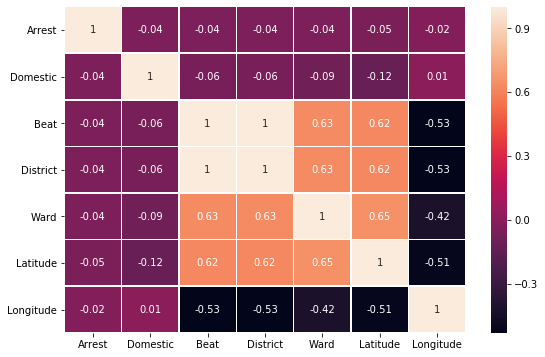

In [72]:
#Checking Correlation plot between features
corr = data_rm_cols.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(round(corr,2), annot =True,linewidths=.5, ax=ax)

**Arrests in 2019:**

There are *40,289* aressts in 2019.

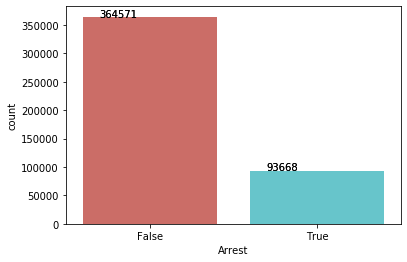

In [73]:
sns.countplot(x='Arrest',data=data_rm_cols, palette='hls')
arrests = sns.countplot(x="Arrest", data=data_rm_cols, palette='hls')

for p in arrests.patches:
        arrests.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

**Arrests vs Domestic/Non Domestic**

Out of *40,289* arrests more than 90% of them are non-domestic and rest is domestic

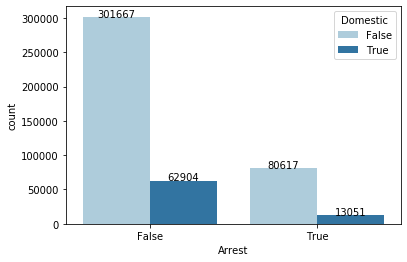

In [74]:
arrests_domestic = sns.countplot(x="Arrest", hue="Domestic", data=data_rm_cols, palette='Paired')
for p in arrests_domestic.patches:
    arrests_domestic.text(p.get_x()+p.get_width()/2.,
             p.get_height()+3,
            '{:d}'.format(p.get_height()),
            ha="center") 

**Districts with most crimes:**

District 11, 6, 8, 1, 18, 4, 7, 12 have highest crime rates

In [75]:
districts_highcrime = data_rm_cols['District'].value_counts().head().index
districts_highcrime

Int64Index([11, 6, 8, 18, 1], dtype='int64')

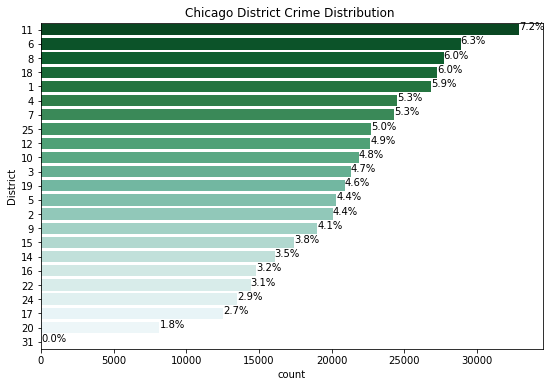

In [76]:
plt.subplots(figsize=(9, 6))
district_crimes_plot = sns.countplot(y="District", data=data_rm_cols,
            order=data_rm_cols['District'].value_counts().index,palette='BuGn_r')
total = len(data_rm_cols['District'])
for p in district_crimes_plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        district_crimes_plot.annotate(percentage, (x, y))
district_crimes_plot.set_title('Chicago District Crime Distribution ')
plt.show()

**Finding Aggravated Crimes:**
The goal of this project is to predict and potentially reduce heinous crimes that causes bodily/life harm.
List of crime types can be reference in this website: http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html
The crime type are displayed as codes in the field called FBI_CODE in the dataset.

In [77]:
for x in sorted(data_rm_cols['FBI Code'].unique()):
    print (x, end=' '),

01A 01B 02 03 04A 04B 05 06 07 08A 08B 09 10 11 12 13 14 15 16 17 18 19 20 22 24 26 

Few FBI codes that corresponds to aggravated crimes are:
* 01A : Homicide 1st and 2nd Degree
* 01B : Involuntary Manslaughter
* 02   : Criminal Sexual Assault
* 04A : Aggravated Assault
* 04B : Aggravated Battery
* 08A : Simple Assault
* 08B : Simple Battery

Above crime types could lead to death or bodiy harm of human beings. The goal of police department has been to reduce such kind of crimes.

In [78]:
fbi_code_agg = ['01A','01B','02','04A','04B','08A','08B']


There  are more occurance of theft (fbi_code =06) in all districts. 
http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html
District 1,6,10,11,12 had most crimes in Chicago. Among all incidents in district 11, drug abuse (fbi_code=18) was the highest followed by bodily harm (fbi_code=08B). Most crime in district 10 was bodily harm. 
Police departments accross Chicago has been fighting to reduce all kinds of crime. But their main goal is to reduce homicide, assault and battery and criminal sexual abuse. 
Based on this goal. The goal is to predict above crimes and assist police departments in respective districts to deploy police for standby
https://www.govtech.com/public-safety/Chicago-Police-Cut-Crime-with-Major-Upgrades-to-Analytics-and-Field-Technology.html


**Cluster Analysis of Crime Type vs Districts**

Let focus on top 5 crime districts and getting aggravated crimes:

In [129]:
# Getting Aggravated crimes in top 5 crime districts
data_slct_cols = data_rm_cols[['FBI Code', 'District', 'Location Description', 'Description', 'Date', 'Block']]
district_agg_crime = data_slct_cols[(data_slct_cols['District'].isin(districts_highcrime)) 
                            & (data_slct_cols['FBI Code'].isin(fbi_code_aggravated))].copy()
district_agg_crime.head()

,FBI Code,District,Location Description,Description,Date,Block
4,08B,6,APARTMENT,DOMESTIC BATTERY SIMPLE,12/31/2018 11:55:00 PM,078XX S SANGAMON ST
6,08B,6,APARTMENT,DOMESTIC BATTERY SIMPLE,12/31/2018 11:48:00 PM,079XX S LAFLIN ST
23,04A,8,SIDEWALK,AGGRAVATED: HANDGUN,12/31/2018 11:27:00 PM,041XX W 79TH ST
44,08B,8,RESIDENCE,DOMESTIC BATTERY SIMPLE,12/31/2018 10:49:00 PM,029XX W 62ND ST
52,04A,8,SIDEWALK,AGGRAVATED: OTHER FIREARM,12/31/2018 10:33:00 PM,060XX S MASON AVE


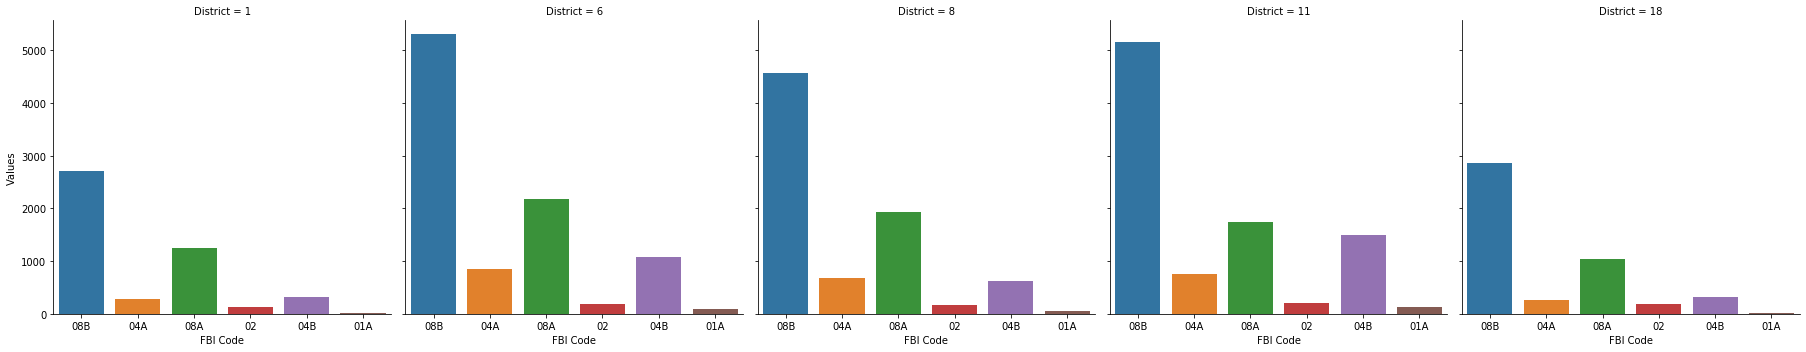

In [130]:
fig=sns.catplot(col="District", x="FBI Code", data=district_agg_crime, kind="count",col_wrap=5);
fig.set_axis_labels('FBI Code', 'Values')

* District 6 has the highest cases of
    * 04A -Aggravate battery,
    * 08B - Simple Battery and
    * highest 08A - Simple Assault 
    
    
* District 11 (highest crime district 2019) has the highest cases of 
    * 04B Aggravated Batter 
    * 01A Homicide 1st and 2nd degree
    
    
* District 11 and 18 has high cases of
    * 02 Criminal Sexual Assault
    
 #### Crime Patterns
 
 **Date:**
 
 We would like to see few patterns for these crimes. So let us choose few features to see crime pattern:
    * Month/Date
    * Time
    * Location Description

In [224]:
district_agg_crime['Date_only'] = pd.to_datetime(district_agg_crime['Date']).dt.date
district_agg_crime['Time'] = pd.to_datetime(district_agg_crime['Date']).dt.strftime('%H')
district_agg_crime['Day'] = pd.to_datetime(district_agg_crime['Date_only']).dt.day_name()
district_agg_crime['Month'] = pd.to_datetime(district_agg_crime['Date']).dt.month

In [225]:
# Using DataFrame.insert() to add a column 

district_agg_crime.head()

,FBI Code,District,Location Description,Description,Date,Block,Date_only,Time,Day,Month
4,08B,6,APARTMENT,DOMESTIC BATTERY SIMPLE,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,2018-12-31,23,Monday,12
6,08B,6,APARTMENT,DOMESTIC BATTERY SIMPLE,12/31/2018 11:48:00 PM,079XX S LAFLIN ST,2018-12-31,23,Monday,12
23,04A,8,SIDEWALK,AGGRAVATED: HANDGUN,12/31/2018 11:27:00 PM,041XX W 79TH ST,2018-12-31,23,Monday,12
44,08B,8,RESIDENCE,DOMESTIC BATTERY SIMPLE,12/31/2018 10:49:00 PM,029XX W 62ND ST,2018-12-31,22,Monday,12
52,04A,8,SIDEWALK,AGGRAVATED: OTHER FIREARM,12/31/2018 10:33:00 PM,060XX S MASON AVE,2018-12-31,22,Monday,12


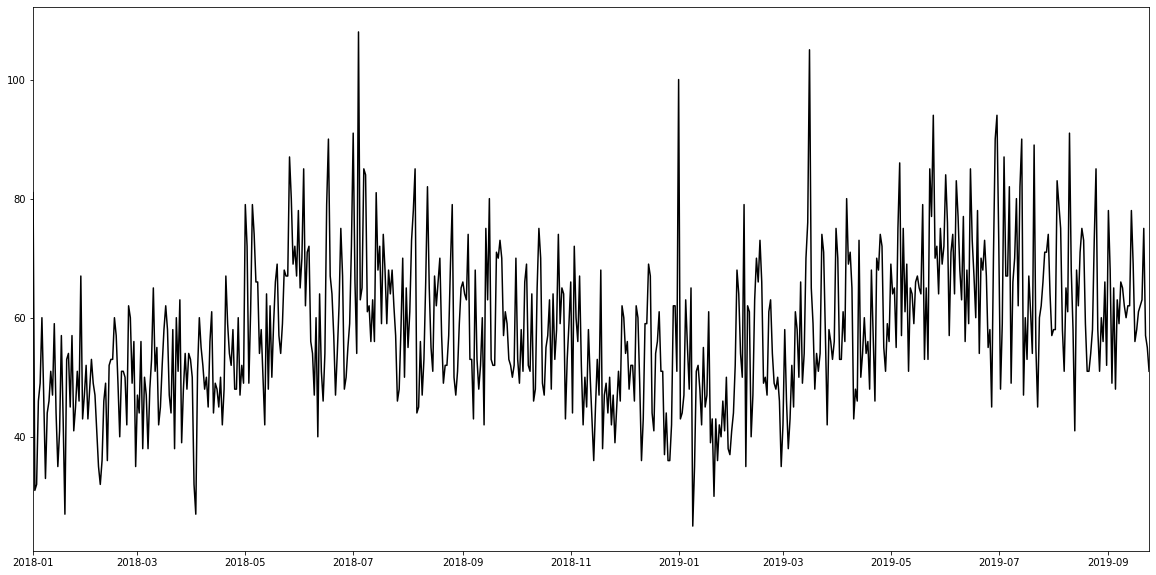

In [133]:
date_count = district_agg_crime['Date_only'].value_counts()
plt.figure(figsize=(20,10))
date_count.plot(color='black')

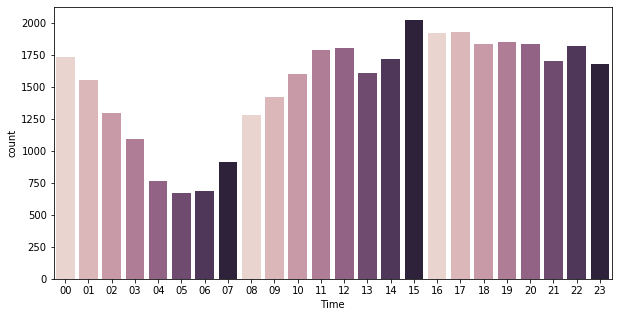

In [134]:
plt.figure(figsize=(10,5))
sns.countplot(x=district_agg_crime['Time'],palette=sns.cubehelix_palette(8))

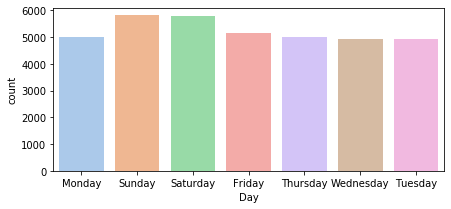

In [135]:
plt.figure(figsize=(7,3))
sns.countplot(x=district_agg_crime['Day'],palette=sns.color_palette("pastel", 7))

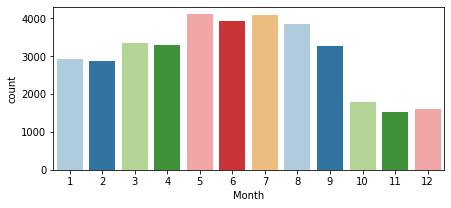

In [228]:
plt.figure(figsize=(7,3))
sns.countplot(x=district_agg_crime['Month'],palette=sns.color_palette("Paired", 7))

From above we can see that there is high crime usually on 1st January. Then it peaked on mid March.
But it remained fairly consistent. Crimes seems to be higher than usual during summer.

Time wise, crime seems to be on low in mornings but gains momentum around 10 am .
Most crimes seem to occur around 3 pm in the afternoon.And is high until midnight.

Saturdays and Sundays seem to be the highest crime  occuring day but it is not super deviated.

**Location:**


From location description, we can see that aggravated crime occurs in residential area, street, public buildings and schools. 

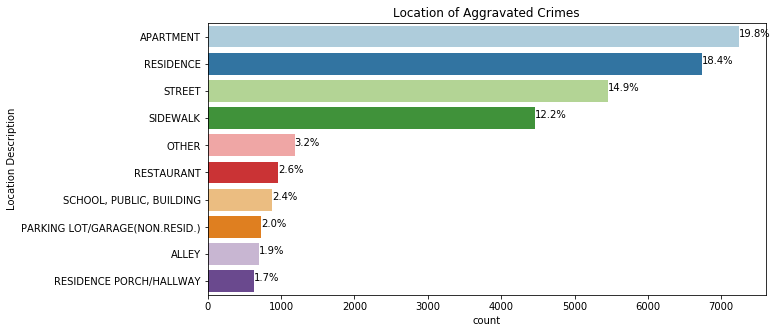

In [136]:
plt.figure(figsize=(10,5))
description_plot = sns.countplot(y="Location Description", data=district_agg_crime,
            order=district_agg_crime['Location Description'].value_counts()[:10].index,palette='Paired')
total = len(district_agg_crime['Location Description'])
for p in description_plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        description_plot.annotate(percentage, (x, y))
description_plot.set_title('Location of Aggravated Crimes')
plt.show()

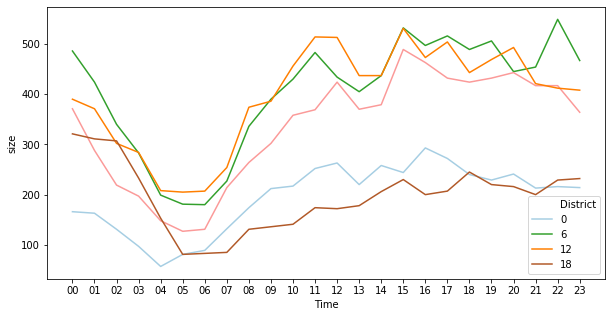

In [209]:
# Scatter Plot between Location of aggravated crimes vs time
district_time=district_agg_crime[['District', 'Time']]
disrict_time_count=district_time.groupby(['District','Time']).size()
disrict_time_count_indx = disrict_time_count.to_frame(name = 'size').reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="Time", y="size", hue="District", data=disrict_time_count_indx, palette='Paired')
plt.show()

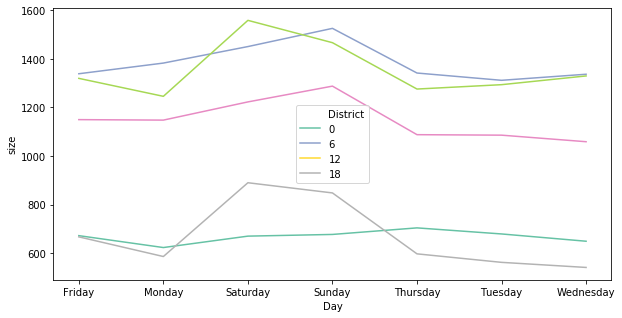

In [220]:
# Scatter Plot between Location of aggravated crimes vs Day
district_day=district_agg_crime[['District', 'Day']]
district_day_count=district_day.groupby(['District','Day']).size()
district_day_count_indx = district_day_count.to_frame(name = 'size').reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="Day", y="size", hue="District", data=district_day_count_indx, palette='Set2')
plt.show()

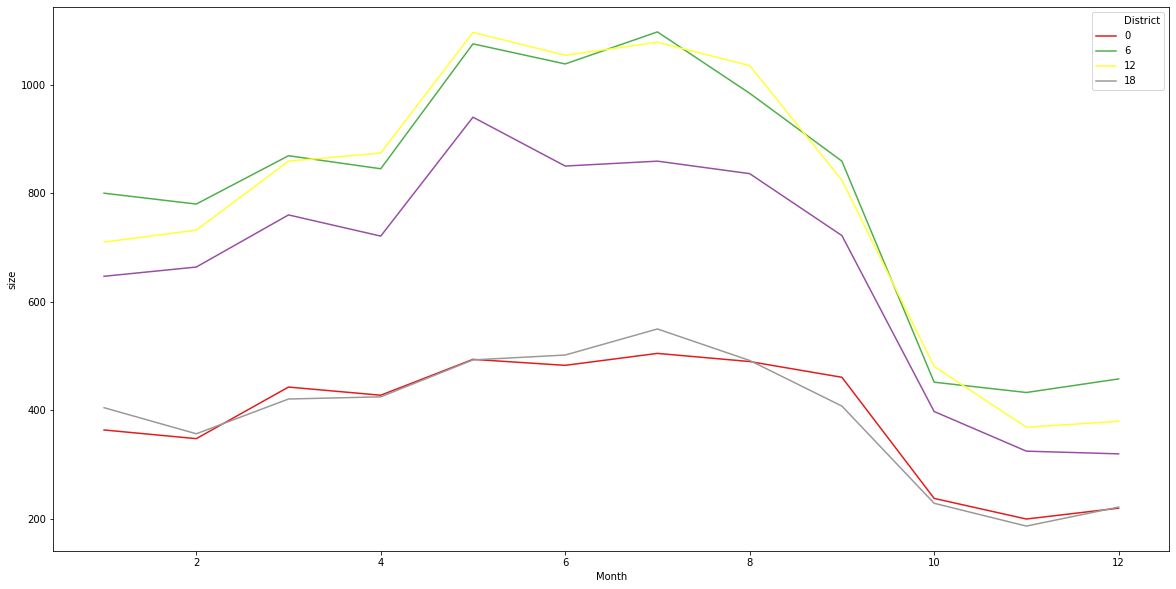

In [226]:
# Scatter Plot between Location of aggravated crimes vs Day
district_month=district_agg_crime[['District', 'Month']]
district_month_count=district_month.groupby(['District','Month']).size()
district_month_count_indx = district_month_count.to_frame(name = 'size').reset_index()

plt.figure(figsize=(20,10))
sns.lineplot(x="Month", y="size", hue="District", data=district_month_count_indx, palette='Set1')
plt.show()

In [ ]:
#Location plot MAP

#### PRE-DEVELOP

So what do we really want to solve? Lets think. 
It would be great for police department to predict where and when aggravated crime is going to occur. 
Based on the information, police department in each district could schedule officers in each area.

We could use time series analysis, random forest/decision tree or logistic regression.



## 3. DEVELOP

#### DECISION TREE

We use few of the parameter we picked above to determine where aggravated crime is likely going to occur and when.

* Use Cluster analysis to find which district has more of such crimes
* Use logistic regression  to predict if aggravated crimes will occur or not. 
* For logistic, Create another field called Aggravated and train the model. Use other factors like date and time
* Use decision tree/ random forest
* Use time series Analysis

In [ ]:
agg_crimes_high_district = district_agg_crime['District'].value_counts()

# Import 'train_test_split'
from sklearn.model_selection import train_test_split 

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(district_agg_crime,agg_crimes_high_district,test_size=0.2,random_state=90)